In [1]:
import py_stringmatching as sm

In [2]:
text_1 = "I am looking for a good book on machine learning."
text_2 = "I am looking for a book on machine learning."

Distance is converted into a similarity function s

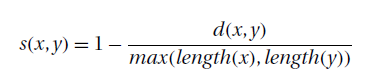

# Levenshtein and Edit distance

In [3]:
lev = sm.Levenshtein()
print(lev.get_sim_score(text_1, text_2))
print(lev.get_raw_score(text_1, text_2)) #Edit distance

0.8979591836734694
5


# Needleman-Wunch score
Computes a score based on a similarity function, coincidence and 

In [10]:
n1 = "david"
n2= "dave"

In [11]:
needleman_wunsch = sm.NeedlemanWunsch( gap_cost=0.5, sim_func=lambda a, b: 1 if a==b else 0)
print(needleman_wunsch.get_raw_score(n1, n2))

2.5


In [12]:
needleman_wunsch = sm.NeedlemanWunsch( gap_cost=0.5, sim_func=lambda a, b: 1 if a==b else 0)
print(needleman_wunsch.get_raw_score(n1, n2))

2.5


As similarity using $$s = 1-\frac{d(x,y)}{max(length(x),length(y))}$$

In [13]:
print(1-needleman_wunsch.get_raw_score(n1, n2)/max(len(n1),len(n2)))

0.5


0 is "equal", greater is "different"

In [15]:
n1 = "davi"
n2= "david"
print(1 - needleman_wunsch.get_raw_score(n1, n2)/max(len(n1),len(n2)))

0.30000000000000004


In [23]:
n1 = "David Smith"
n2 = "David Richardson Smith"
needleman_wunsch = sm.NeedlemanWunsch( gap_cost=1, sim_func=lambda a, b: 1 if a==b else 0)
af_gap= sm.Affine(gap_start=1,gap_continuation=0.5,sim_func=lambda a, b: 1 if a==b else 0)
print(needleman_wunsch.get_raw_score(n2, n1))
print(1-needleman_wunsch.get_raw_score(n1, n2)/max(len(n1),len(n2)))
print(af_gap.get_raw_score(n1,n2))
print(1 - af_gap.get_raw_score(n1, n2)/max(len(n1),len(n2)))


0.0
1.0
5.0
0.7727272727272727


# Smith-Waterman
- The Smith-Waterman measure is designed to find matching substrings by introducing two key changes to the Needleman-Wunch measure. First, the measure allows the match to restart at any position in the strings (no longer limited to just the first position)
- The second key change is that after computing the matrix using the recurrence equation, the algorithm starts retracing the arrows from the largest value in the matrix (4 in our example) rather than starting from the lower-right corner (3 in the matrix). This change effectively ignores suffixes if the match they produce is not optimal

In [24]:
n1 = "Prof. David R. Smith"
n2 = "David Smith"
sw = sm.SmithWaterman(gap_cost=1,sim_func=lambda a, b: 1 if a==b else 0)
print(sw.get_raw_score(n1,n2))
print(1 - (sw.get_raw_score(n1, n2)/max(len(n1),len(n2))))
print(af_gap.get_raw_score(n1,n2))
print(1 - af_gap.get_raw_score(n1, n2)/max(len(n1),len(n2)))

8.0
0.6
5.5
0.725


# Jaro Measure
The Jaro measure was developed mainly to compare short strings, such as first and last
names

In [25]:
jaro = sm.Jaro()
print(jaro.get_raw_score('MARTHA', 'MARHTA'))
print(1 - (jaro.get_raw_score(n1, n2)))
print(1 - jaro.get_raw_score('MARTHA', 'MARTHA'))

0.9444444179534912
0.24090909957885742
0.0


# Jaro-Winkler
The Jaro-Winkler measure is designed to capture cases where two strings have a low Jaro
score, but share a prefix and thus are still likely to match. Specifically, the measure introduces
two parameters: PL, which is the length of the longest common prefix between the
two strengths, and PW, which is the weight to give the prefix

In [30]:
print(text_1)
print(text_2)
jw = sm.JaroWinkler(prefix_weight=0.25)
print(jw.get_raw_score(text_1, text_2))
print(1- jw.get_raw_score(text_1, text_2)/max(len(text_1),len(text_2)))
print(jw.get_sim_score(text_1, text_2))

I am looking for a good book on machine learning.
I am looking for a book on machine learning.
1.0
0.9795918367346939
1.0


# Set-Based Similarity

In [31]:
text_2 = "I am looking for a good book related to statistics."
print(text_1)
print(text_2)
oc = sm.OverlapCoefficient()
print(oc.get_sim_score(text_1.split(" "), text_2.split(" ")))
print(oc.get_raw_score(text_1.split(" "), text_2.split(" ")))
print(1- oc.get_raw_score(text_1.split(" "), text_2.split(" "))/max(len(text_1),len(text_2)))

I am looking for a good book on machine learning.
I am looking for a good book related to statistics.
0.7
0.7
0.9862745098039216


# Generalized jaccard
This similarity measure is softened version of the Jaccard measure. The Jaccard measure is promising candidate for tokens which exactly match across the sets. However, in practice tokens are often misspelled, such as energy vs. eneryg. THe generalized Jaccard measure will enable matching in such cases

In [32]:
text_1= "I am lookig for a god book on machine learning."
gj = sm.GeneralizedJaccard(sim_func=lambda a, b: 1 if a==b else 0)
print(text_1)
print(text_2)
print(1- oc.get_sim_score(text_1.split(" "), text_2.split(" ")))

I am lookig for a god book on machine learning.
I am looking for a good book related to statistics.
0.5


# TF / IDF
This measure employs the notion of TF/IDF score commonly used in information retrieval (IR) to find documents that are relevant to keyword queries. The intuition underlying the TF/IDF measure is that two strings are similar if they share distinguishing terms

In [33]:
text_1= "I am lookig for a good book on machine learning."
tfidf = sm.TfIdf(dampen=False)
print(text_1)
print(text_2)
print(1 - tfidf.get_sim_score(text_1.split(" "), text_2.split(" ")))

I am lookig for a good book on machine learning.
I am looking for a good book related to statistics.
0.7272727272727273


# Soft TF / IDF
In case you have misspelled words

In [79]:
text_1= "I am lookig for an good book on machine learning."
softtfidf = sm.SoftTfIdf()
print(text_1)
print(text_2)
print(1 - softtfidf.get_raw_score(text_1.split(" "), text_2.split(" ")))

I am lookig for an good book on machine learning.
I am looking for a good book related to statistics.
0.2407407426834106


# Soundex
Depends on language, short words

In [40]:
so = sm.Soundex()
print(so.get_raw_score("Anders","Anthers"))

1


# Partial Ratio
Fuzzy Wuzzy partial ratio raw score is a measure of the strings similarity as an int in the range [0, 100]. Given two strings X and Y, let the shorter string (X) be of length m. It finds the fuzzy wuzzy ratio similarity measure between the shorter string and every substring of length m of the longer string, and returns the maximum of those similarity measures. Fuzzy Wuzzy partial ratio sim score is a float in the range [0, 1]

In [42]:
pr = sm.PartialRatio()
n1= "Apple Inc"
n2 = "Apple"
print(n1)
print(n2)
print(pr.get_sim_score(n1, n2))

Apple Inc
Apple
1.0


# Bag Distance
Calculate distance over X, Y based on counting the elements that are not present in both sets:

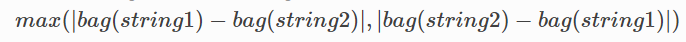

In [93]:
bd = sm.BagDistance()
n1= "Apple Inc"
n2 = "Aple InK"
print(n1)
print(n2)
print(1 - bd.get_raw_score(n1, n2)/max(len(n1),len(n2)))

Apple Inc
Aple InK
0.7777777777777778


# Ochiai coefficient
Similar to Cosine distance
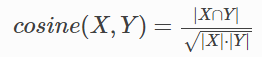

In [95]:
cos = sm.Cosine()
text_1= "I am lookig for a good book on machine learning."
print(text_1)
print(text_2)
print(1 - cos.get_sim_score(text_1.split(" "),text_2.split(" ")))

I am lookig for a good book on machine learning.
I am looking for a good book related to statistics.
0.40000000000000013


# Hamming Distance
The Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. Thus, it measures the minimum number of substitutions required to change one string into the other, or the minimum number of errors that could have transformed one string into the other.

In [44]:
n1 = "Hello World"
n2 = "Hell0 W0rld"
hd = sm.HammingDistance()
print(hd.get_raw_score(n1,n2))
print(1 - (hd.get_sim_score(n1,n2)))

2
0.18181818181818188


In [ ]:


string1 = "apple"
string2 = "banana"

# Calculate the similarity using different measures
ratio = fuzz.ratio(string1, string2)
partial_ratio = fuzz.partial_ratio(string1, string2)
token_sort_ratio = fuzz.token_sort_ratio(string1, string2)
token_set_ratio = fuzz.token_set_ratio(string1, string2)

# Print the similarity scores
print("Ratio:", ratio)
print("Partial Ratio:", partial_ratio)
print("Token Sort Ratio:", token_sort_ratio)
print("Token Set Ratio:", token_set_ratio)


# Jaccard
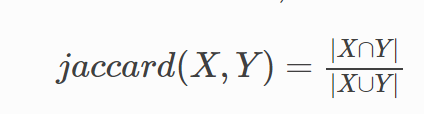

In [12]:
jcc = sm.Jaccard()
print(text_1)
print(text_2)
print(1 - jcc.get_sim_score(text_1.split(" "), text_2.split(" ")))

I am looking for a good book on machine learning.
I am looking for a book on machine learning.
0.09999999999999998


# Monge-Elkan
The Monge-Elkan similarity measure is a type of hybrid similarity measure that combines the benefits of sequence-based and set-based methods. This can be effective for domains in which more control is needed over the similarity measure. It implicitly uses a secondary similarity measure, such as Levenshtein to compute over all similarity score

In [45]:
me = sm.MongeElkan() # Default is Jaro-Winkler
print(me.get_raw_score(['Comput.', 'Sci.', 'and', 'Eng.', 'Dept.,', 'University', 'of', 'California,', 'San', 'Diego'], 
                       ['Department', 'of', 'Computer', 'Science,', 'Univ.', 'Calif.,', 'San', 'Diego']))

0.8364448130130768
